In [10]:


%pip install seaborn tensorflow

import os

# Automatically rename problematic numpy.py file if it exists
if os.path.exists("numpy.py"):
	os.rename("numpy.py", "numpy_backup.py")
	print("Renamed 'numpy.py' to 'numpy_backup.py' to avoid circular import errors.")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model

Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
len(x_train)

60000

In [13]:
len(x_test)

10000

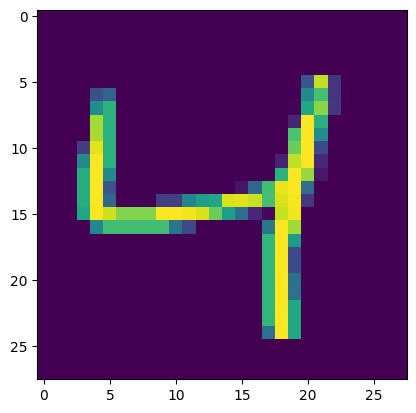

In [14]:
plt.imshow(x_train[2] )

In [15]:
y_train[2]

np.uint8(4)

In [16]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [17]:
x_test_flat.shape

(10000, 784)

In [18]:
x_train = x_train.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
model = Sequential([
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

In [21]:
model.compile(loss='categorical_crossentropy' , metrics=['accuracy'] , optimizer='adam')

In [22]:
batch_size =128
hidden_units = 256
dropoutn = 0.45


In [23]:
num_labels = len(np.unique(y_train))

In [24]:
model.fit(x_train_flat, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8975 - loss: 2.7374
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9525 - loss: 0.2899
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9663 - loss: 0.1583
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9729 - loss: 0.1150
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9744 - loss: 0.1056
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9782 - loss: 0.0894
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9781 - loss: 0.0883
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9784 - loss: 0.0885
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9811 - loss: 0.0740
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9823 - loss: 0.0718
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9828 - loss: 0.0680
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━

In [25]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9712 - loss: 0.2000


[0.20002587139606476, 0.9711999893188477]

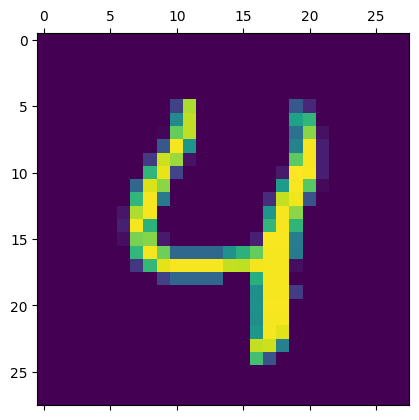

In [26]:
plt.matshow(x_test[4])

In [27]:
y_pred = model.predict(x_test_flat)
y_pred[4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([5.5237486e-23, 0.0000000e+00, 1.1922384e-12, 5.0793267e-24,
       1.0000000e+00, 1.4620029e-21, 5.0812458e-16, 2.6950328e-13,
       2.3899126e-17, 4.0182844e-09], dtype=float32)

In [28]:
np.argmax(y_pred[4])

np.int64(4)

In [29]:
!pip install joblib

In [30]:
import joblib
joblib.dump(model,"model.pkl")

['model.pkl']